In [1]:
#Import library
import pandas as pd
import json as js
from pandas.io.json import json_normalize

#import matplotlib
import matplotlib.pyplot as plt

#import numpy
import numpy as np

# import seaborn
import seaborn as sns
%matplotlib inline

#import stats
from scipy import stats

In [2]:
#load datasets CA
dfGBvideos = pd.read_csv("datasets/GBVideos.csv")
dfGBcategory = pd.read_csv("datasets/GBcategories.csv")

# set option agar float dapat ditampilkan seluruhnya
pd.set_option('float_format', '{:f}'.format)

## DATA VIDEO REGION GREAT BRITAIN
Berikut adalah data video dari region Great Britain :

In [3]:
dfGBvideos.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

#### Karena kolom trending_date pada semua data video adalah string dengan format year.month.day (contoh : 17.11.14), maka objek dari kolom tersebut perlu diubah menjadi bentuk datetime

In [4]:
dfGBvideos['trending_date'] =  pd.to_datetime(dfGBvideos['trending_date'], format='%y.%d.%m')

In [5]:
dfGBvideos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,2017-11-14,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,2017-11-14,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [6]:
dfGBvideos.shape

(38916, 16)

Berdasarkan pengecekan data video dari region Great Britain memiliki dimensi <b>40881 baris x 16 kolom</b>.

## DATA KATEGORI VIDEO REGION GREAT BRITAIN
Berikut adalah data kategori video region Great Britain setelah diubah menjadi dataframe :

In [7]:
dfGBcategory

,id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,19,Travel & Events
6,20,Gaming
7,22,People & Blogs
8,23,Comedy
9,24,Entertainment


In [8]:
dfGBcategory.shape

(16, 2)

Berdasarkan pengecekan data kategori region Great Britain memiliki dimensi <b>31 baris x 2 kolom</b>.

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## A. STATISTIK DARI SETIAP KATEGORI YANG TERDAPAT DI DATAFRAME VIDEOS GREAT BRITAIN
Kita perlu mengetahui statistik berikut untuk setiap kategori :
#### 1. Data tertinggi, terendah, dan rata-rata viewer
#### 2. Data tertinggi, terendah, dan rata-rata likes
#### 3. Data tertinggi, terendah, dan rata-rata dislikes
#### 5. Data tertinggi, terendah, dan rata-rata jumlah komentar

Di sini kita akan menemukan statistik data video dari region Great Britain menggunakan list <b>gGBvideo</b> yang mana adalah list di mana video kelompokkan berdasarkan id kategori.<br/>

Untuk menemukan rata-rata digunakan fungsi <b>.max()</b> pada data grup id kategori yang diinginkan. Untuk menemukan value tertinggi digunakan <b>.max()</b> dan untuk menemukan value terkecil digunakan <b>.min()</b>

In [9]:
# mengelompokan berdasarkan id kategori
gGBvideo = dfGBvideos.groupby('category_id')

# memasukkan id kategori ke dalam bentuk array untuk digunakan dalam eksplorasi
a = dfGBvideos.category_id.unique()
a.sort(axis=0)
a

array([ 1,  2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 43],
      dtype=int64)

### 1A. Data tertinggi, terendah, dan rata-rata viewer Great Britain

In [10]:
# memasukkan data ke dalam list
data_view_gb = {
    
    # a adalah hasil sorting array saat menemukan value yang unique dari id kategori data video region Great Britain
    'id' : a,
    #penonton tertinggi
    'highest_views':[gGBvideo.get_group(items)['views'].max() for items in dfGBcategory['id']],
    
    #penonton terendah
    'lowest_views':[gGBvideo.get_group(items)['views'].min() for items in dfGBcategory['id']],
    
    #penonton rata-rata
    'average_views':[gGBvideo.get_group(items)['views'].mean() for items in dfGBcategory['id']]}

dfViewGB = pd.DataFrame(data_view_gb)

In [11]:
dfViewGB = pd.merge(dfGBcategory,dfViewGB,on="id")

print("")
print("DATA VIEWER SETIAP KATEGORI DI REGION GREAT BRITAIN")
dfViewGB


DATA VIEWER SETIAP KATEGORI DI REGION GREAT BRITAIN


,id,category,highest_views,lowest_views,average_views
0,1,Film & Animation,42560014,2441,3245132.955374
1,2,Autos & Vehicles,5362914,1858,1487392.458333
2,10,Music,424538912,2152,12444442.690781
3,15,Pets & Animals,6416920,25232,1013708.938202
4,17,Sports,22975455,1930,1752352.487677
5,19,Travel & Events,6362355,3254,1383177.010417
6,20,Gaming,18158133,7350,976856.561521
7,22,People & Blogs,62338362,1184,1966605.546480
8,23,Comedy,43460605,10676,2167430.056346
9,24,Entertainment,169884583,2650,3264607.961530


### 2A. Data tertinggi, terendah, dan rata-rata likes Great Britain

In [12]:
# memasukkan data ke dalam list
data_likes_gb = {
    
    # a adalah hasil sorting array saat menemukan value yang unique dari id kategori data video region Great Britain
    'id' : a,
    'highest_likes':[gGBvideo.get_group(items)['likes'].max() for items in dfGBcategory['id']],
    'lowest_likes':[gGBvideo.get_group(items)['likes'].min() for items in dfGBcategory['id']],
    'average_likes':[gGBvideo.get_group(items)['likes'].mean() for items in dfGBcategory['id']
                   ]}

dfLikesGB = pd.DataFrame(data_likes_gb)

In [13]:
dfLikesGB = pd.merge(dfGBcategory,dfLikesGB,on="id")

print("")
print("DATA LIKES SETIAP KATEGORI DI REGION GREAT BRITAIN")
dfLikesGB


DATA LIKES SETIAP KATEGORI DI REGION GREAT BRITAIN


,id,category,highest_likes,lowest_likes,average_likes
0,1,Film & Animation,461135,0,57205.523089
1,2,Autos & Vehicles,114841,61,24608.506944
2,10,Music,5613827,0,272138.508943
3,15,Pets & Animals,187524,147,28629.913858
4,17,Sports,1291139,0,39270.313057
5,19,Travel & Events,23791,54,9674.447917
6,20,Gaming,1031695,0,39220.127517
7,22,People & Blogs,625174,0,46273.495899
8,23,Comedy,1253154,22,78431.168490
9,24,Entertainment,3312868,0,81572.362012


### 3B. Data tertinggi, terendah, dan rata-rata dislikes Great Britain

In [14]:
# memasukkan data ke dalam list
data_dislikes_gb = {
    
    # a adalah hasil sorting array saat menemukan value yang unique dari id kategori data video region Great Britain
    'id' : a,
    'highest_dislikes':[gGBvideo.get_group(items)['dislikes'].max() for items in dfGBcategory['id']],
    'lowest_dislikes':[gGBvideo.get_group(items)['dislikes'].min() for items in dfGBcategory['id']],
    'average_dislikes':[gGBvideo.get_group(items)['dislikes'].mean() for items in dfGBcategory['id']
                   ]}

dfDislikesGB = pd.DataFrame(data_dislikes_gb)

In [15]:
dfDislikesGB = pd.merge(dfGBcategory,dfDislikesGB,on="id")

print("")
print("DATA DISLIKES SETIAP KATEGORI DI REGION GREAT BRITAIN")
dfDislikesGB


DATA DISLIKES SETIAP KATEGORI DI REGION GREAT BRITAIN


,id,category,highest_dislikes,lowest_dislikes,average_dislikes
0,1,Film & Animation,37132,0,2403.156383
1,2,Autos & Vehicles,12647,1,1952.708333
2,10,Music,421473,0,11587.191799
3,15,Pets & Animals,3461,1,685.505618
4,17,Sports,193053,0,5199.032512
5,19,Travel & Events,2434,0,361.614583
6,20,Gaming,17093,0,1288.846756
7,22,People & Blogs,258504,0,4102.040328
8,23,Comedy,38693,2,2533.107768
9,24,Entertainment,1944971,0,9656.526852


### 4B. Data tertinggi, terendah, dan rata-rata jumlah komentar Great Britain

In [16]:
# memasukkan data ke dalam list
data_comments_gb = {
    # a adalah hasil sorting array saat menemukan value yang unique dari id kategori data video region Great Britain
    'id' : a,
    'highest_comments':[gGBvideo.get_group(items)['comment_count'].max() for items in dfGBcategory['id']],
    'lowest_comments':[gGBvideo.get_group(items)['comment_count'].min() for items in dfGBcategory['id']],
    'average_comments':[gGBvideo.get_group(items)['comment_count'].mean() for items in dfGBcategory['id']
                   ]}

dfCommentsGB = pd.DataFrame(data_comments_gb)

In [17]:
dfCommentsGB = pd.merge(dfGBcategory,dfCommentsGB,on="id")

print("")
print("DATA COMMENTS SETIAP KATEGORI DI REGION GREAT BRITAIN")
dfCommentsGB


DATA COMMENTS SETIAP KATEGORI DI REGION GREAT BRITAIN


,id,category,highest_comments,lowest_comments,average_comments
0,1,Film & Animation,50255,0,6049.674428
1,2,Autos & Vehicles,12083,0,3507.534722
2,10,Music,1228655,0,21303.849062
3,15,Pets & Animals,18532,23,2630.520599
4,17,Sports,91663,0,5273.322496
5,19,Travel & Events,2716,7,1231.010417
6,20,Gaming,31803,0,3449.101790
7,22,People & Blogs,154958,0,6395.471292
8,23,Comedy,205692,4,9145.960613
9,24,Entertainment,1626501,0,12812.082420


<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## B. BOXPLOTTING ABSOLUTE VALUE BERDASARKAN KATEGORI DATA VIDEO GREAT BRITAIN

Berikut adalah data jumlah viewer region Great Britain apabila divisualisasikan dengan boxplot. Karena data terlalu beragam, outliernya terlalu tinggi dan tidak dapat dilihat dengan baik.

### 1B. Boxplotting Absolute Value Viewer Berdasarkan Kategori Data Video Great Britain

In [18]:
# list jumlah views wilayah Great Britain berdasarkan array a
data_view_gb_boxplot = [gGBvideo.get_group(items)['views'].values for items in a]

Text(0, 0.5, 'Jumlah Viewer')

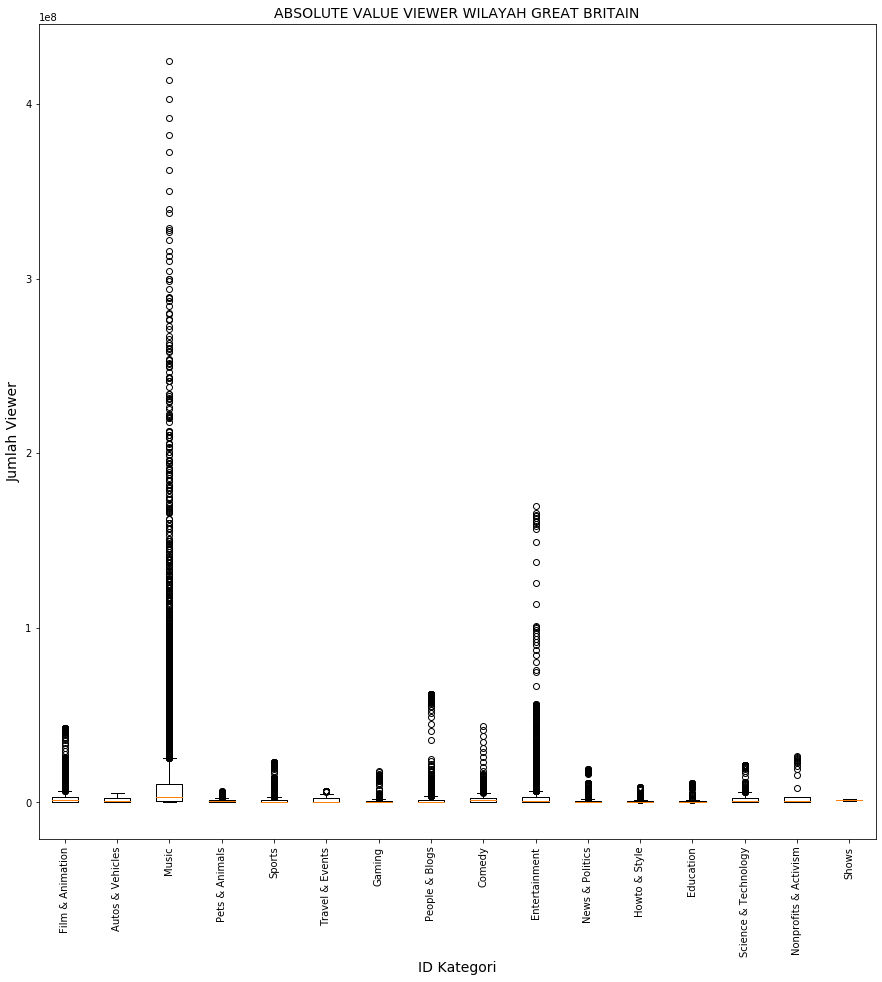

In [19]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(data_view_gb_boxplot)

# penamaan x tick berdasarkan id kategori Great Britain
ax.set_xticklabels(dfGBcategory['category'], rotation='vertical')

# penamaan judul
plt.title("ABSOLUTE VALUE VIEWER WILAYAH GREAT BRITAIN", fontsize=14)

# penamaan label
plt.xlabel("ID Kategori", fontsize=14)
plt.ylabel("Jumlah Viewer", fontsize=14)

Karena setelah dilakukan boxplotting outlier terlihat terlalu banyak maka diputgbkan untuk dicoba dilakukan outlier removal dengan metode z-score dan IQR pada salah satu kategori yaitu Entertainment yang mana ada di urutan 9 pada array a.

#### Testing Z-Score Viewer Salah Satu Kategori Video Great Britain Yaitu Entertainment

In [20]:
data_view_gb_test = {
    
    # a adalah hasil sorting array saat menemukan value yang unique dari id kategori data video region Great Britain
    'id' : a,
    #penonton tertinggi
    'viewer':[gGBvideo.get_group(items)['views'].values for items in dfGBcategory['id']]
}

dfViewGBtest = pd.DataFrame(data_view_gb_test)
dfViewGBtest

,id,viewer
0,1,"[2794165, 3037613, 333552, 44921, 750287, 2841..."
1,2,"[704363, 109148, 1530286, 803844, 111759, 1546..."
2,10,"[17158579, 33523622, 154494, 9548677, 946859, ..."
3,15,"[426078, 467804, 490300, 512261, 43009, 535958..."
4,17,"[27833, 306724, 86296, 156822, 146530, 33746, ..."
5,19,"[1932429, 2200529, 2374145, 2533102, 19451, 27..."
6,20,"[1062094, 747313, 226202, 99578, 7309863, 7278..."
7,22,"[1164201, 110769, 2464, 422874, 181351, 113988..."
8,23,"[3371669, 3578502, 359120, 189374, 10676, 2820..."
9,24,"[1053632, 1182775, 728547, 2237404, 5541767, 2..."


In [21]:
data_ent_gb_view = {
    'viewer' : dfViewGBtest.loc[9, 'viewer'],
    'z-score' : stats.zscore(dfViewGBtest.loc[9, 'viewer'])
}

dfEntertainViewTest = pd.DataFrame(data_ent_gb_view)

In [22]:
# Membuat Dataframe Baru yang telah difilter tanpa outlier
dfEntertainViewTestz = dfEntertainViewTest[dfEntertainViewTest['z-score'] < 3]

dfEntertainViewTestz

,viewer,z-score
0,1053632,-0.240525
1,1182775,-0.226476
2,728547,-0.275890
3,2237404,-0.111746
4,5541767,0.247725
...,...,...
9119,3158685,-0.011523
9120,20981880,1.927404
9121,14261473,1.196313
9122,2665975,-0.065123


Text(0, 0.5, 'Jumlah Views')

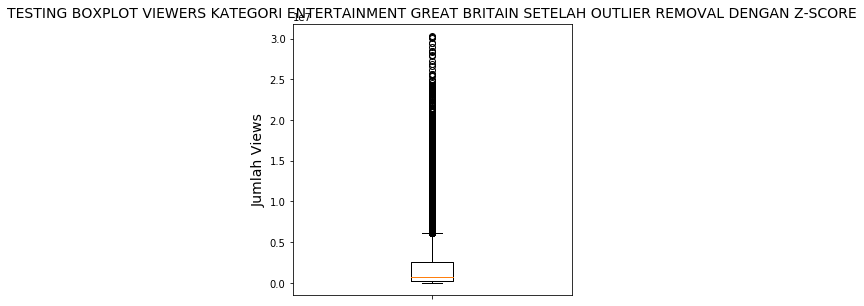

In [23]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfEntertainViewTestz['viewer'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("TESTING BOXPLOT VIEWERS KATEGORI ENTERTAINMENT GREAT BRITAIN SETELAH OUTLIER REMOVAL DENGAN Z-SCORE", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

Setelah dilakukan outlier removal dengan Z-Score masih terlihat bahwa outlier dianggap masih terlalu banyak hingga sulit untuk dibaca, maka diputgbkan untuk mencoba dilakukan outlier removal dengan IQR

Step untuk mendeteksi outlier salah satunya adalah dengan menemukan range bawah dan atas dari suatu data dengan cara berikut :
1. Mengurutkan data dari nilai terendah
2. Menghitung Q1 (kuartil 1)
3. Menghitung Q3 (kuartil 3)
4. Menghitung IQR = (Q3 - Q1)
5. Menemukan range bawah data = Q1 -(1.5 * IQR)
6. Menemukan range atas data = Q3 + (1.5 * IQR)

In [24]:
Q1_test_ent_GB = dfEntertainViewTest.viewer.quantile(0.25)
Q3_test_ent_GB = dfEntertainViewTest.viewer.quantile(0.75)
IQR_test_ent_GB = Q3_test_ent_GB - Q1_test_ent_GB
lower_test_ent_GB = Q1_test_ent_GB  - (1.5 * IQR_test_ent_GB)
upper_test_ent_GB =  Q3_test_ent_GB + (1.5 * IQR_test_ent_GB)

print("IQR Ent Great Britain")
print("IQR =", IQR_test_ent_GB)
print("Lower =", lower_test_ent_GB)
print("Upper =", upper_test_ent_GB)

IQR Ent Great Britain
IQR = 2532836.0
Lower = -3527348.75
Upper = 6603995.25


In [25]:
dfEntertainViewTest_IQRView = dfEntertainViewTest[(dfEntertainViewTest.viewer < upper_test_ent_GB) & (dfEntertainViewTest.viewer > lower_test_ent_GB)]

Text(0, 0.5, 'Jumlah Views')

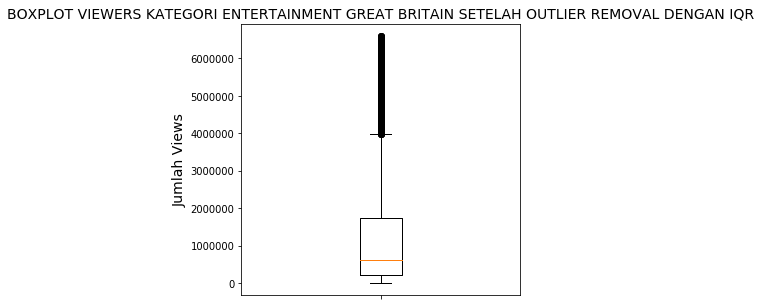

In [26]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfEntertainViewTest_IQRView['viewer'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS KATEGORI ENTERTAINMENT GREAT BRITAIN SETELAH OUTLIER REMOVAL DENGAN IQR", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

Setelah dilakukan outlier removal dengan IQR masih terlihat bahwa outlier masih cukup sulit untuk dibaca, di sini akhirnya diputgbkan untuk <b>menampilkan boxplot tanpa outlier</b>.

Text(0, 0.5, 'Jumlah Viewer')

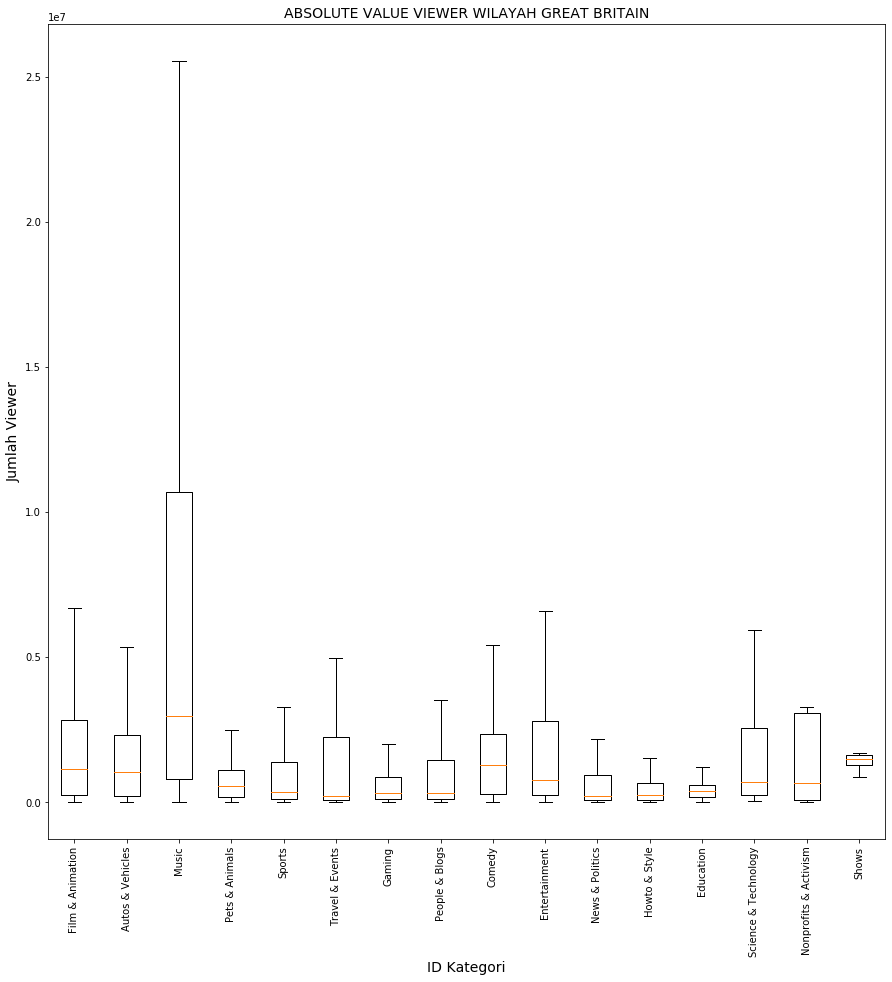

In [27]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(data_view_gb_boxplot, showfliers=False)

# penamaan x tick berdasarkan id kategori Great Britain
ax.set_xticklabels(dfGBcategory['category'], rotation='vertical')

# penamaan judul
plt.title("ABSOLUTE VALUE VIEWER WILAYAH GREAT BRITAIN", fontsize=14)

# penamaan label
plt.xlabel("ID Kategori", fontsize=14)
plt.ylabel("Jumlah Viewer", fontsize=14)

### 2B. Boxplotting Absolute Value Likes Berdasarkan Kategori Data Video Great Britain

In [28]:
# list jumlah views wilayah Great Britain berdasarkan array a
data_likes_gb_boxplot = [gGBvideo.get_group(items)['likes'].values for items in a]

Text(0, 0.5, 'Jumlah Viewer')

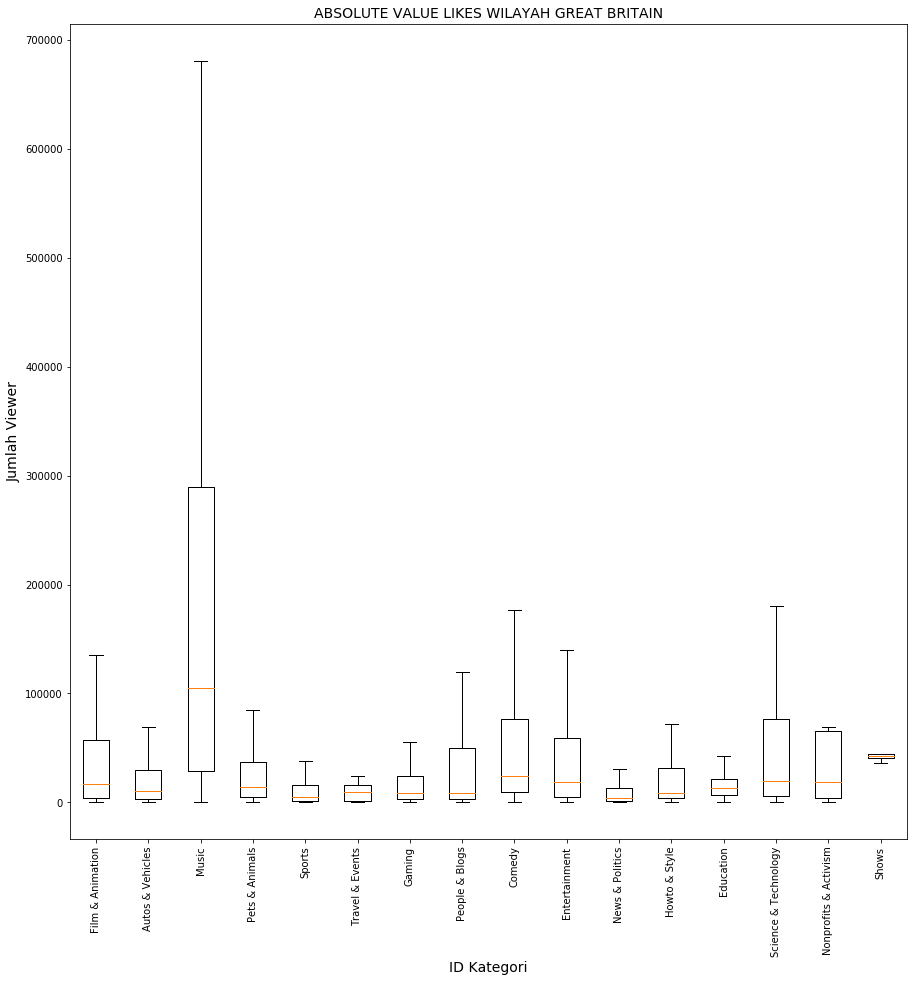

In [29]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(data_likes_gb_boxplot, showfliers=False)

# penamaan x tick berdasarkan id kategori Great Britain
ax.set_xticklabels(dfGBcategory['category'], rotation='vertical')

# penamaan judul
plt.title("ABSOLUTE VALUE LIKES WILAYAH GREAT BRITAIN", fontsize=14)

# penamaan label
plt.xlabel("ID Kategori", fontsize=14)
plt.ylabel("Jumlah Viewer", fontsize=14)

### 3B. Boxplotting Absolute Value Dislikes Berdasarkan Kategori Data Video Great Britain

In [30]:
# list jumlah views wilayah Great Britain berdasarkan array a
data_dislikes_gb_boxplot = [gGBvideo.get_group(items)['dislikes'].values for items in a]

Text(0, 0.5, 'Jumlah Viewer')

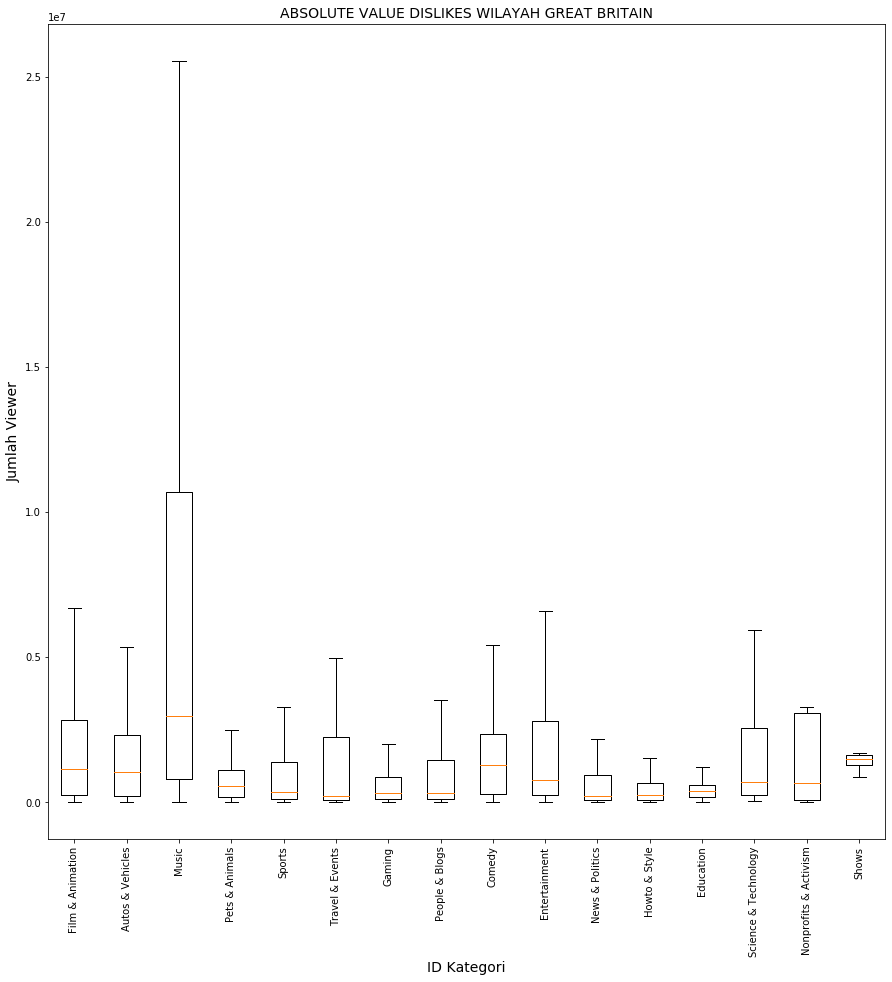

In [31]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(data_view_gb_boxplot, showfliers=False)

# penamaan x tick berdasarkan id kategori Great Britain
ax.set_xticklabels(dfGBcategory['category'], rotation='vertical')

# penamaan judul
plt.title("ABSOLUTE VALUE DISLIKES WILAYAH GREAT BRITAIN", fontsize=14)

# penamaan label
plt.xlabel("ID Kategori", fontsize=14)
plt.ylabel("Jumlah Viewer", fontsize=14)

### 4B. Boxplotting Absolute Value Jumlah Komentar Berdasarkan Kategori Data Video Great Britain

In [32]:
# list jumlah views wilayah Great Britain berdasarkan array a
data_view_gb_boxplot = [gGBvideo.get_group(items)['views'].values for items in a]

Text(0, 0.5, 'Jumlah Viewer')

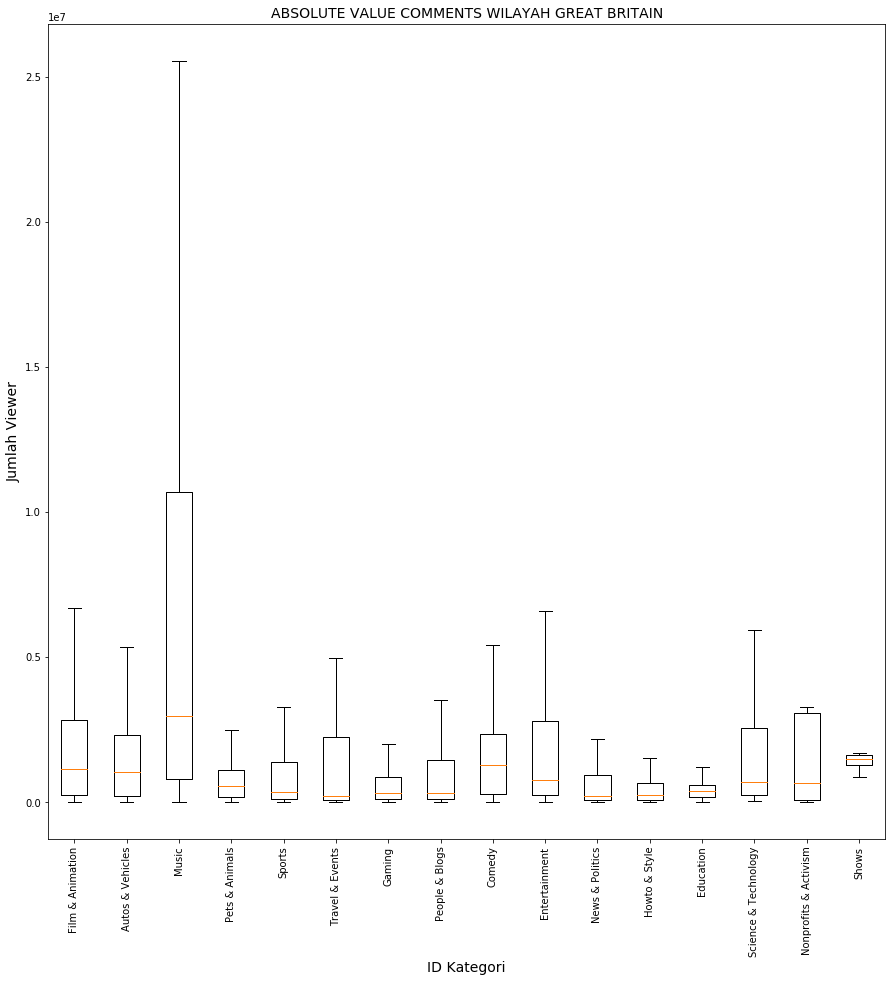

In [33]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(data_view_gb_boxplot, showfliers=False)

# penamaan x tick berdasarkan id kategori Great Britain
ax.set_xticklabels(dfGBcategory['category'], rotation='vertical')

# penamaan judul
plt.title("ABSOLUTE VALUE COMMENTS WILAYAH GREAT BRITAIN", fontsize=14)

# penamaan label
plt.xlabel("ID Kategori", fontsize=14)
plt.ylabel("Jumlah Viewer", fontsize=14)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## C. BOXPLOTTING RELATIVE VALUE BERDASARKAN KATEGORI DATA VIDEO GREAT BRITAIN
Karena melakukan boxplotting terhadap absolute value untuk jumlah views, likes, dislikes, dan comments tidak dapat dilihat dengan baik karena data terlalu diverse. Maka diputgbkan untuk melakukan boxplotting likes, dislikes, dan comments terhadap views untuk setiap video kemudian dikalikan 100 agar range value terjaga mulai dari 0 hingga 100.


<b>Operasinya adalah sebagai sebagai berikut :<br/>
- Jumlah Likes / Jumlah Views * 100<br/>
- Jumlah Dislikes / Jumlah Views * 100<br/>
- Jumlah Comments / Jumlah Views * 100<br/></b>

Untuk itu maka dataframe video perlu dimodifikasi dengan menghapgb kolom yang tidak diperlukan dan menambahkan kolom baru dari setiap operasi yang dilakukan

In [34]:
# drop kolom yang tidak perlu
dfGB = dfGBvideos.drop([
    'trending_date','channel_title','publish_time','tags','thumbnail_link','comments_disabled','ratings_disabled',
  'video_error_or_removed','description'], axis=1)

In [35]:
# Menambah kolom likes/views
dfGB['likes/views(%)'] = dfGB['likes']/dfGB['views']*100

In [36]:
# Menambah kolom dislikes/views
dfGB['dislikes/views(%)'] = dfGB['dislikes']/dfGB['views']*100

In [37]:
# Menambah kolom comments/views
dfGB['comments/views(%)'] = dfGB['comment_count']/dfGB['views']*100

Berikut adalah data video Great Britain setelah dimodifikasi. Dataframe ditambah kolom sebagai berikut :
<b>
- likes/views
- dislikes/views
- comments/views
</b>
semua dalam persen (%)

In [38]:
dfGB.head()

,video_id,title,category_id,views,likes,dislikes,comment_count,likes/views(%),dislikes/views(%),comments/views(%)
0,Jw1Y-zhQURU,John Lewis Christmas Ad 2017 - #MozTheMonster,26,7224515,55681,10247,9479,0.770723,0.141837,0.131206
1,3s1rvMFUweQ,Taylor Swift: …Ready for It? (Live) - SNL,24,1053632,25561,2294,2757,2.425989,0.217723,0.261666
2,n1WpP7iowLc,Eminem - Walk On Water (Audio) ft. Beyoncé,10,17158579,787420,43420,125882,4.589075,0.253051,0.733639
3,PUTEiSjKwJU,Goals from Salford City vs Class of 92 and Fri...,17,27833,193,12,37,0.693421,0.043114,0.132936
4,rHwDegptbI4,Dashcam captures truck's near miss with child ...,25,9815,30,2,30,0.305655,0.020377,0.305655


Karena data video telah dimodifikasi, maka pengelompokan ulang berdasarkan id kategori perlu dilakukan kembali

In [39]:
gGBvideo = dfGB.groupby('category_id')

In [40]:
data_relative_views_gb = {
    
    # a adalah hasil sorting array saat menemukan value yang unique dari id kategori data video region Great Britain
    'id' : a,
    'category' : [i for i in dfGBcategory['category']],
    'likes/views(%)': [gGBvideo.get_group(items)['likes/views(%)'].values for items in dfGBcategory['id']],
    'dislikes/views(%)': [gGBvideo.get_group(items)['dislikes/views(%)'].values for items in dfGBcategory['id']],
    'comments/views(%)': [gGBvideo.get_group(items)['comments/views(%)'].values for items in dfGBcategory['id']]
}

dfRelativeViewsGB = pd.DataFrame(data_relative_views_gb)
dfRelativeViewsGB

,id,category,likes/views(%),dislikes/views(%),comments/views(%)
0,1,Film & Animation,"[0.3175904071520472, 3.0087111162613542, 4.008...","[0.033605746260510744, 0.09105834087489091, 0....","[0.05150017983905746, 0.2362381251331226, 0.30..."
1,2,Autos & Vehicles,"[2.321530233700521, 2.951955143474915, 3.52607...","[0.03180178402329481, 0.05680360611280097, 0.0...","[0.11939866233745952, 0.4938248983032213, 0.19..."
2,10,Music,"[4.589074654725196, 4.874544880621789, 1.40005...","[0.25305125791593813, 0.06288699950142619, 0.0...","[0.733638840372504, 0.25375241374574625, 0.136..."
3,15,Pets & Animals,"[4.535085125258755, 4.267171721490197, 4.14419...","[0.057501208698876725, 0.057288950073107546, 0...","[0.22179037640995314, 0.2037177963420578, 0.19..."
4,17,Sports,"[0.6934214781015341, 3.1269154027725254, 0.728...","[0.04311428879387777, 0.0867229170198615, 0.08...","[0.13293572378112312, 0.14605964971766147, 0.7..."
5,19,Travel & Events,"[0.8797735906467975, 0.8098961658764778, 0.783...","[0.08802393257397814, 0.08266194174219017, 0.0...","[0.08797218423031325, 0.08102597148231175, 0.0..."
6,20,Gaming,"[3.5250175596510287, 4.49717855838183, 1.20865...","[0.055550638644037156, 0.24701831762594792, 0....","[0.6264982195549547, 1.8231985794439545, 0.222..."
7,22,People & Blogs,"[4.9226035710328375, 4.540078902942159, 1.3392...","[0.06433596947606127, 0.07312515234406738, 0.2...","[0.053598991926651844, 0.2753477958634636, 0.3..."
8,23,Comedy,"[6.011147594855841, 8.591164682875684, 4.21307...","[0.10066231293759856, 0.0719015945778429, 0.06...","[0.5957287029064834, 0.3422661214105791, 0.318..."
9,24,Entertainment,"[2.4259893397315193, 4.4562998034283785, 1.723...","[0.21772307598858046, 0.12098666272114308, 0.2...","[0.26166631233675514, 0.19724799729449813, 0.1..."


### 1C. Boxplotting Relative Value Likes/Views Data Video Great Britain

#### Berikut adalah hasil boxplot jumlah likes terhadap jumlah views di Great Britain

Text(0, 0.5, 'LIKES/VIEWS')

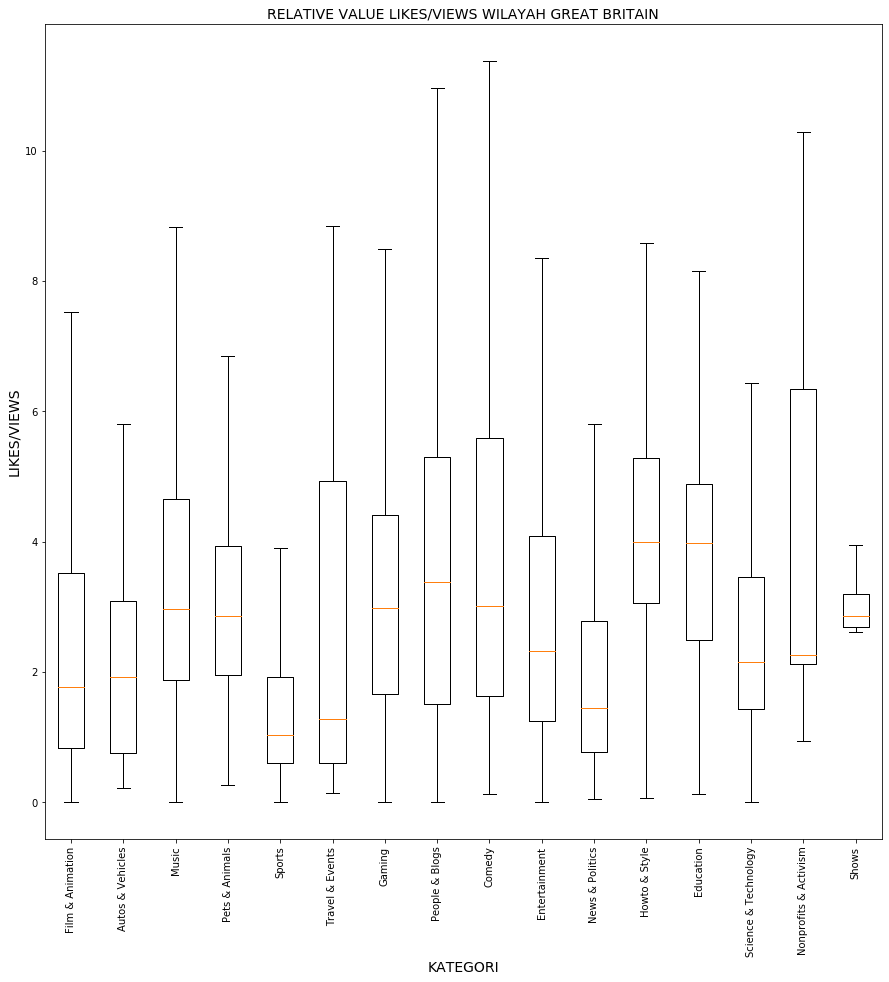

In [41]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfRelativeViewsGB['likes/views(%)'].values, showfliers=False)

# penamaan x tick
ax.set_xticklabels(dfRelativeViewsGB['category'], rotation='vertical')

# penamaan judul
plt.title("RELATIVE VALUE LIKES/VIEWS WILAYAH GREAT BRITAIN", fontsize=14)

# penamaan label
plt.xlabel("KATEGORI", fontsize=14)
plt.ylabel("LIKES/VIEWS", fontsize=14)

### 2C. Boxplotting Relative Value Dislikes/Views Data Video Great Britain

#### Berikut adalah hasil boxplot jumlah dislikes terhadap jumlah views di Great Britain

Text(0, 0.5, 'DISLIKES/VIEWS')

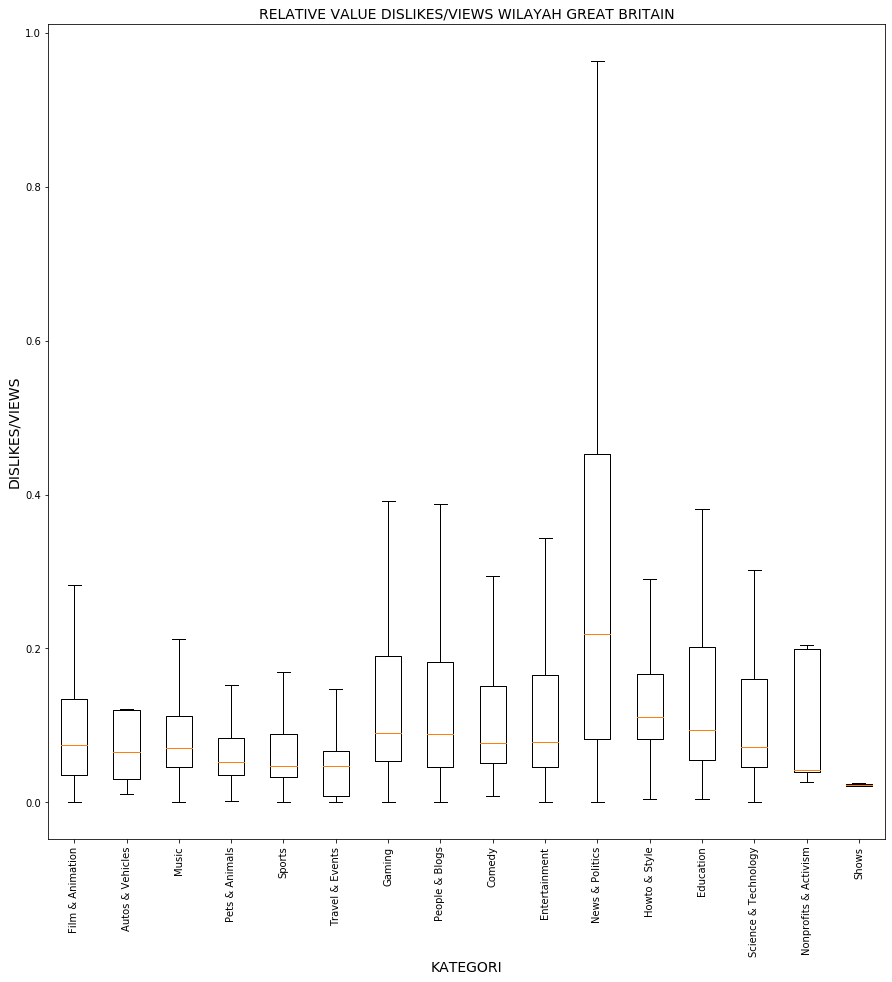

In [42]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfRelativeViewsGB['dislikes/views(%)'].values, showfliers=False)

# penamaan x tick
ax.set_xticklabels(dfRelativeViewsGB['category'], rotation='vertical')

# penamaan judul
plt.title("RELATIVE VALUE DISLIKES/VIEWS WILAYAH GREAT BRITAIN", fontsize=14)

# penamaan label
plt.xlabel("KATEGORI", fontsize=14)
plt.ylabel("DISLIKES/VIEWS", fontsize=14)

Text(0, 0.5, 'COMMENTS/VIEWS')

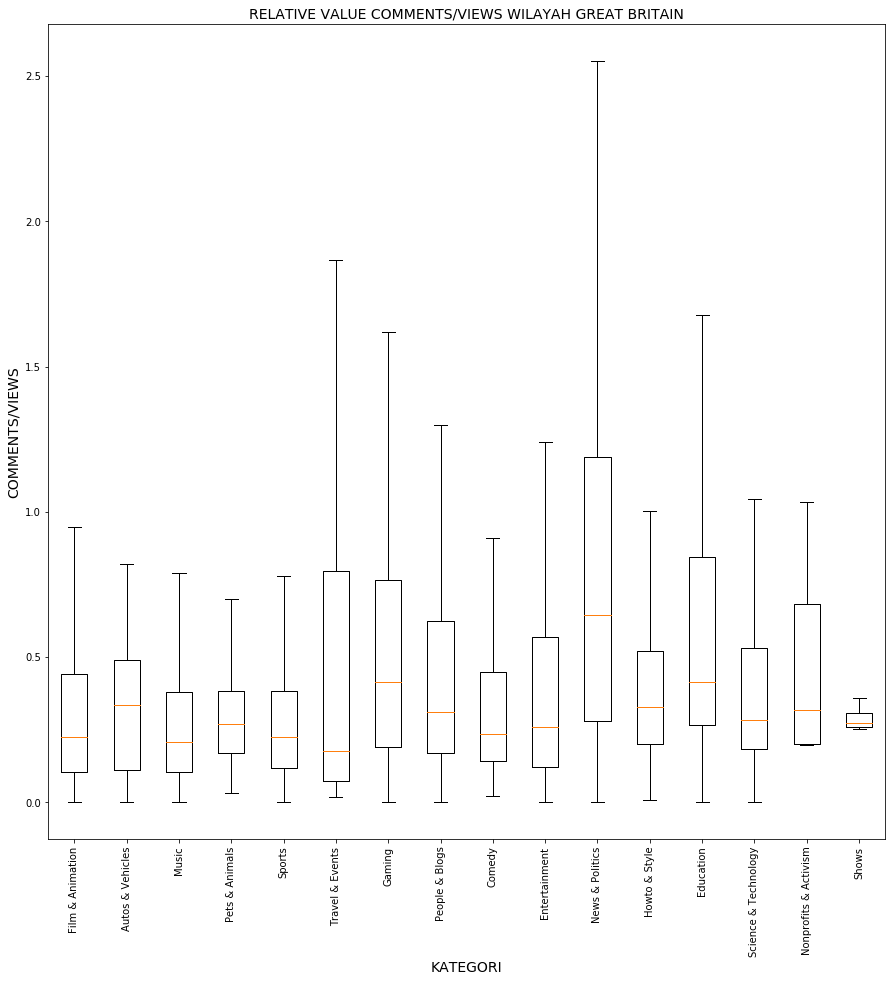

In [43]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfRelativeViewsGB['comments/views(%)'].values, showfliers=False)

# penamaan x tick
ax.set_xticklabels(dfRelativeViewsGB['category'], rotation='vertical')

# penamaan judul
plt.title("RELATIVE VALUE COMMENTS/VIEWS WILAYAH GREAT BRITAIN", fontsize=14)

# penamaan label
plt.xlabel("KATEGORI", fontsize=14)
plt.ylabel("COMMENTS/VIEWS", fontsize=14)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></b>

## MENCARI PENYEBAB FIRST TRENDING DI GREAT BRITAIN

Di sini masing-masing datasets dari setiap region ditransform ulang dengan hanya mencantumkan data video pada saat pertama kali video tersebut mengalami trend

Dataframe baru dibuat dari masing-masing datasets dengan <b>grouping by video_id</b> lalu digunakan <b>loc</b> untuk melokasikan data berdasarkan index, lalu yang dicari adalah trending_date pertama kali, <b>maka dicari index terkecil dari masing-masing video_id berdasarkan trending_datenya dengan menggunakan idxmin()</b>

In [44]:
dfGBvideosFirstTrend = dfGBvideos.loc[dfGBvideos.groupby('video_id')['trending_date'].idxmin()][['video_id','trending_date','title','channel_title','category_id','publish_time','tags','views','likes','dislikes','comment_count']]

### Sorting

Dilakukan reindex untuk masing-masing dataframe berdasarkan video_id dan trending_date nya

In [45]:
dfGBvideosFirstTrend = dfGBvideosFirstTrend.sort_values(by=['video_id','trending_date']).reset_index(drop=True)

#### DATA VIDEO FIRST TREND GREAT BRITAIN

Berikut adalah contoh dataframe video Great Britain setelah dimodifikasi dengan hanya menampilkan data-data video saat pertama kali masuk trending

In [46]:
dfGBvideosFirstTrend.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count
0,--uXQQ0h-yQ,2017-12-25,Paul McCartney - Pipes of Peace,PonteFractus,24,2008-11-24T17:59:52.000Z,"ww1|""great""|""war""|""trenches""|""tommies""",24723,216,3,10
1,-3VBPAZPTQI,2017-12-31,NEW YEAR'S EVE MAKEUP TUTORIAL | JAMIE GENEVIEVE,Jamie Genevieve,22,2017-12-29T15:11:23.000Z,"jamie genevieve|""bblogger""|""youtuber""|""makeup""...",209192,11119,153,740
2,-43MBOJnVks,2018-02-14,RAMPAGE - OFFICIAL TRAILER 2 [HD],Warner Bros. Pictures,24,2018-02-13T17:00:07.000Z,"Rampage|""Rampage Movie""|""Rampage Trailer""|""War...",544638,7985,330,1038
3,-5WBCrazSfg,2017-11-29,Neymar will win the Ballon d'Or | Philippe Cou...,Soccer AM,17,2017-11-27T19:44:49.000Z,"Soccer AM|""Football""|""Soccer""|""Premier League""...",172090,4354,53,587
4,-5aaJJQFvOg,2018-02-24,Havana - swing cover | dodie feat. FLASHBACK,doddleoddle,10,2018-02-21T22:01:06.000Z,"havana|""cover""|""a capella""|""swing""|""dodie""|""fl...",509454,82757,842,4535


### Boxplotting Viewer Data Video First Trend Great Britain

Text(0, 0.5, 'Jumlah Views')

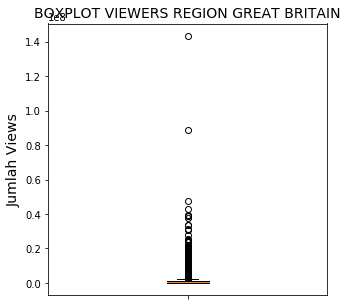

In [47]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfGBvideosFirstTrend['views'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS REGION GREAT BRITAIN", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

## Testing Z-Score Viewer Data Video First Trend Great Britain

In [48]:
# Membuat Kolom Z-Score Untuk Viewer
dfGBvideosFirstTrend['views_zscore'] = (dfGBvideosFirstTrend.views - dfGBvideosFirstTrend.views.mean())/dfGBvideosFirstTrend.views.std(ddof=0)

# Membuat Dataframe Baru yang telah difilter tanpa outlier
dfGBvideosFirstTrend_zView = dfGBvideosFirstTrend[dfGBvideosFirstTrend.views_zscore < 3]

dfGBvideosFirstTrend_zView

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,views_zscore
0,--uXQQ0h-yQ,2017-12-25,Paul McCartney - Pipes of Peace,PonteFractus,24,2008-11-24T17:59:52.000Z,"ww1|""great""|""war""|""trenches""|""tommies""",24723,216,3,10,-0.289164
1,-3VBPAZPTQI,2017-12-31,NEW YEAR'S EVE MAKEUP TUTORIAL | JAMIE GENEVIEVE,Jamie Genevieve,22,2017-12-29T15:11:23.000Z,"jamie genevieve|""bblogger""|""youtuber""|""makeup""...",209192,11119,153,740,-0.247072
2,-43MBOJnVks,2018-02-14,RAMPAGE - OFFICIAL TRAILER 2 [HD],Warner Bros. Pictures,24,2018-02-13T17:00:07.000Z,"Rampage|""Rampage Movie""|""Rampage Trailer""|""War...",544638,7985,330,1038,-0.170531
3,-5WBCrazSfg,2017-11-29,Neymar will win the Ballon d'Or | Philippe Cou...,Soccer AM,17,2017-11-27T19:44:49.000Z,"Soccer AM|""Football""|""Soccer""|""Premier League""...",172090,4354,53,587,-0.255538
4,-5aaJJQFvOg,2018-02-24,Havana - swing cover | dodie feat. FLASHBACK,doddleoddle,10,2018-02-21T22:01:06.000Z,"havana|""cover""|""a capella""|""swing""|""dodie""|""fl...",509454,82757,842,4535,-0.178560
...,...,...,...,...,...,...,...,...,...,...,...,...
3267,zwEn-ambXLw,2018-03-24,This Is Me - Cover by Shoshana Bean Featuring ...,Shoshana Bean,10,2018-03-22T08:30:07.000Z,"travis wall|""shoshana bean""|""greatest showman""...",52796,3265,24,150,-0.282758
3268,zwrlJwed2mQ,2017-12-24,BigCityBeats WORLD CLUB DOME Zero Gravity (Off...,BigCityBeats,24,2017-12-13T13:58:13.000Z,"BigCityBeats|""Zero Gravity""|""Flugzeug""|""Airpla...",52023,585,1,16,-0.282935
3269,zxGg8QqWrRQ,2017-12-14,"K Michelle on Boyfriend Kastan Sims, Having T...",ESSENCE,24,2017-12-06T19:37:48.000Z,"Essence|""essence live""|""Essence Now""|""Dr. Kast...",100286,1804,89,331,-0.271922
3270,zxjv0lo8bU8,2018-05-24,MARCELO's son ENZO shows off his skills in the...,Real Madrid,17,2018-05-16T13:03:18.000Z,"Real Madrid C.F.|""Real Madrid""|""Real madrid ci...",214591,9137,76,552,-0.245840


Text(0, 0.5, 'Jumlah Views')

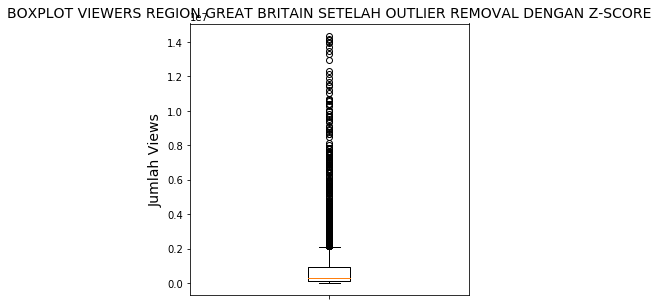

In [49]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfGBvideosFirstTrend_zView['views'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS REGION GREAT BRITAIN SETELAH OUTLIER REMOVAL DENGAN Z-SCORE", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

## Testing IQR Viewer Data Video First Trend Great Britain
Step untuk mendeteksi outlier salah satunya adalah dengan menemukan range bawah dan atas dari suatu data dengan cara berikut :
1. Mengurutkan data dari nilai terendah
2. Menghitung Q1 (kuartil 1)
3. Menghitung Q3 (kuartil 3)
4. Menghitung IQR = (Q3 - Q1)
5. Menemukan range bawah data = Q1 -(1.5 * IQR)
6. Menemukan range atas data = Q3 + (1.5 * IQR)

1. Mengurutkan data dari yang terendah

In [50]:
dfGBvideosFirstTrendSortViews = dfGBvideosFirstTrend.sort_values(by=['views'])

2. Menghitung Q1 (kuartil 1)

In [51]:
Q1_GBFirstTrendView = dfGBvideosFirstTrendSortViews.views.quantile(0.25)

3. Menghitung Q3 (kuartil 3)

In [52]:
Q3_GBFirstTrendView = dfGBvideosFirstTrendSortViews.views.quantile(0.75)

4. Menghitung IQR = (Q3 - Q1)

In [53]:
IQR_GBFirstTrendView = Q3_GBFirstTrendView - Q1_GBFirstTrendView

5. Menemukan range bawah data = Q1 -(1.5 * IQR)

In [54]:
lower_GBFirstTrendView = Q1_GBFirstTrendView - (1.5 * IQR_GBFirstTrendView)

6. Menemukan range atas data = Q3 + (1.5 * IQR)

In [55]:
upper_GBFirstTrendView =  Q3_GBFirstTrendView + (1.5 * IQR_GBFirstTrendView)

<b>Berikut adalah hasil perhitungan yang telah dilakukan di atas</b>

In [56]:
print("IQR Great Britain")
print("IQR =", IQR_GBFirstTrendView)
print("Lower =", lower_GBFirstTrendView)
print("Upper =", upper_GBFirstTrendView)

IQR Great Britain
IQR = 878130.25
Lower = -1228350.625
Upper = 2284170.375


In [57]:
dfGBvideosFirstTrend_IQRView = dfGBvideosFirstTrendSortViews[(dfGBvideosFirstTrendSortViews.views < upper_GBFirstTrendView) & (dfGBvideosFirstTrendSortViews.views > lower_GBFirstTrendView)]

Text(0, 0.5, 'Jumlah Views')

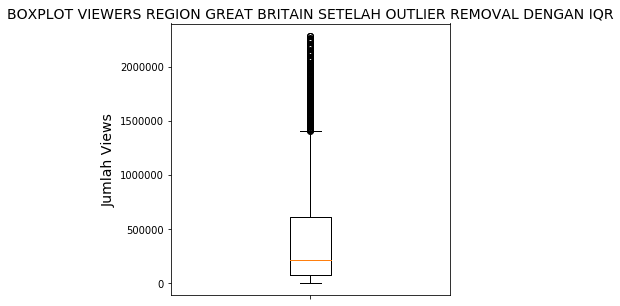

In [58]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfGBvideosFirstTrend_IQRView['views'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS REGION GREAT BRITAIN SETELAH OUTLIER REMOVAL DENGAN IQR", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

Di sini coba dilakukan boxplotting tanpa menampilkan outlier

Text(0, 0.5, 'Jumlah Views')

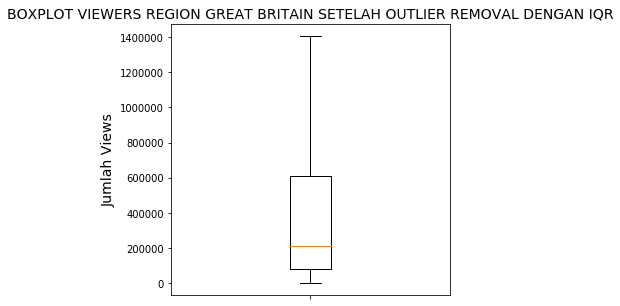

In [59]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfGBvideosFirstTrend_IQRView['views'].values, showfliers=False)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS REGION GREAT BRITAIN SETELAH OUTLIER REMOVAL DENGAN IQR", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

Text(0, 0.5, 'Jumlah Views')

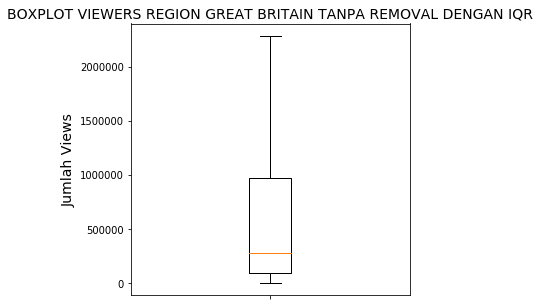

In [60]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfGBvideosFirstTrend['views'].values, showfliers=False)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT VIEWERS REGION GREAT BRITAIN TANPA REMOVAL DENGAN IQR", fontsize=14)

plt.ylabel("Jumlah Views", fontsize=14)

## STATISTIK DARI SETIAP KATEGORI YANG TERDAPAT DI DATAFRAME FIRST TREND VIDEO GREAT BRITAIN

In [61]:
# mengelompokan ulang dataframe videosFirstTrend berdasarkan id kategori
gGBVideoFtrend = dfGBvideosFirstTrend.groupby('category_id')

Membuat dataframe baru yang memiliki kolom id, category yang diambil dari dfGBcategory, dan views yang diambil dari hasil pengelompokkan berdasarkan category_id

data_ftrend_views_gb = {
    
    # a adalah hasil sorting array saat menemukan value yang unique dari id kategori data video region Great Britain
    'id' : a,
    'category' : [i for i in dfGBcategory['category']],
    'views': [gGBVideoFtrend.get_group(items)['views'].values for items in dfGBcategory['id']]
}

dfFtrendViewsGB = pd.DataFrame(data_ftrend_views_gb)
dfFtrendViewsGB

Tetapi setelah menjalankan cell di atas ditemukan bahwa pada dataframe video first trend Great Britain tidak ditemukan id kategori '43' atau kategori Shows. Sedangkan di dataframe video Great Britain pada awalnya ada video dengan kategori '43' atau Shows.

Berikut adalah video dengan kategori 43 pada dataframe dfGBvideos :

In [62]:
dfGBvideos.loc[dfGBvideos['category_id'] == 43]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
35574,JtIY1Naxg0M,2018-05-26,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",876996,34615,234,3448,https://i.ytimg.com/vi/JtIY1Naxg0M/default.jpg,False,False,False,NBA rookies are roasting each other over a gam...
35748,JtIY1Naxg0M,2018-05-27,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",987708,36543,250,3535,https://i.ytimg.com/vi/JtIY1Naxg0M/default.jpg,False,False,False,NBA rookies are roasting each other over a gam...
35922,JtIY1Naxg0M,2018-05-28,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1080101,37899,264,3616,https://i.ytimg.com/vi/JtIY1Naxg0M/default.jpg,False,False,False,NBA rookies are roasting each other over a gam...
36092,JtIY1Naxg0M,2018-05-29,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1154486,39218,281,3750,https://i.ytimg.com/vi/JtIY1Naxg0M/default.jpg,False,False,False,NBA rookies are roasting each other over a gam...
36261,JtIY1Naxg0M,2018-05-30,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1217887,40063,293,3823,https://i.ytimg.com/vi/JtIY1Naxg0M/default.jpg,False,False,False,NBA rookies are roasting each other over a gam...
36443,JtIY1Naxg0M,2018-05-31,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1304684,41227,302,3966,https://i.ytimg.com/vi/JtIY1Naxg0M/default.jpg,False,False,False,NBA rookies are roasting each other over a gam...
36616,JtIY1Naxg0M,2018-06-01,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1360139,41532,308,4000,https://i.ytimg.com/vi/JtIY1Naxg0M/default.jpg,False,False,False,NBA rookies are roasting each other over a gam...
36792,JtIY1Naxg0M,2018-06-02,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1410105,41945,316,4061,https://i.ytimg.com/vi/JtIY1Naxg0M/default.jpg,False,False,False,NBA rookies are roasting each other over a gam...
36962,JtIY1Naxg0M,2018-06-03,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1452779,42322,320,4079,https://i.ytimg.com/vi/JtIY1Naxg0M/default.jpg,False,False,False,NBA rookies are roasting each other over a gam...
37126,JtIY1Naxg0M,2018-06-04,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1486979,42671,328,4108,https://i.ytimg.com/vi/JtIY1Naxg0M/default.jpg,False,False,False,NBA rookies are roasting each other over a gam...


Berikut adalah video dengan kategori 43 pada dataframe first trend dfFtrendViewsGB :

In [63]:
dfGBvideosFirstTrend.loc[dfGBvideosFirstTrend['category_id'] == 43]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,views_zscore


In [64]:
dfGBvideosFirstTrend.loc[dfGBvideosFirstTrend['video_id'] == 'JtIY1Naxg0M']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,views_zscore
1045,JtIY1Naxg0M,2018-05-25,Game of Zones - S5E7: NBA 1K,Bleacher Report,17,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",445567,24409,133,2680,-0.193137


Terlihat bahwa terdapat video dengan id "JtIY1Naxg0M" memiliki id kategori 43, sedangkan di dataframe first trend video dengan kategori 43 tidak ditemukan. Tetapi, video dengan id "JtIY1Naxg0M" ditemukan pada dataframe first trend dengan id kategori 17 dengan index 1045. Kemungkinan pengupload video mengubah kategori videonya setelah video tersebut masuk ke dalam YouTube Trending menjadi 43.

Maka dari itu diputuskan untuk mengubah kategori video dengan id "JtIY1Naxg0M" menjadi kategori 43.

In [65]:
dfGBvideosFirstTrend.loc[1045,'category_id'] = 43

In [66]:
dfGBvideosFirstTrend.loc[dfGBvideosFirstTrend['video_id'] == 'JtIY1Naxg0M']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,views_zscore
1045,JtIY1Naxg0M,2018-05-25,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",445567,24409,133,2680,-0.193137


In [67]:
data_ftrend_views_gb = {
    
    # a adalah hasil sorting array saat menemukan value yang unique dari id kategori data video region Great Britain
    'id' : a,
    'category' : [i for i in dfGBcategory['category']],
    'views': [gGBVideoFtrend.get_group(items)['views'].values for items in dfGBcategory['id']]
}

dfFtrendViewsGB = pd.DataFrame(data_ftrend_views_gb)
dfFtrendViewsGB

,id,category,views
0,1,Film & Animation,"[42076, 80992, 4427381, 387911, 284180, 463086..."
1,2,Autos & Vehicles,"[36069, 1858, 1547142, 705169, 704363, 1865148..."
2,10,Music,"[509454, 1092530, 237150, 441467, 190313, 8445..."
3,15,Pets & Animals,"[52968, 71637, 106298, 50131, 44889, 491427, 2..."
4,17,Sports,"[172090, 211408, 75357, 130027, 1624478, 15235..."
5,19,Travel & Events,"[59546, 76351, 1775039, 89715, 3254, 253735, 4..."
6,20,Gaming,"[387566, 1100530, 334664, 23274, 125010, 99578..."
7,22,People & Blogs,"[209192, 513127, 227704, 1164201, 17036, 67069..."
8,23,Comedy,"[234821, 855521, 665386, 771567, 170214, 29863..."
9,24,Entertainment,"[24723, 544638, 259047, 5040540, 287354, 15538..."


Text(0, 0.5, 'VIEWS')

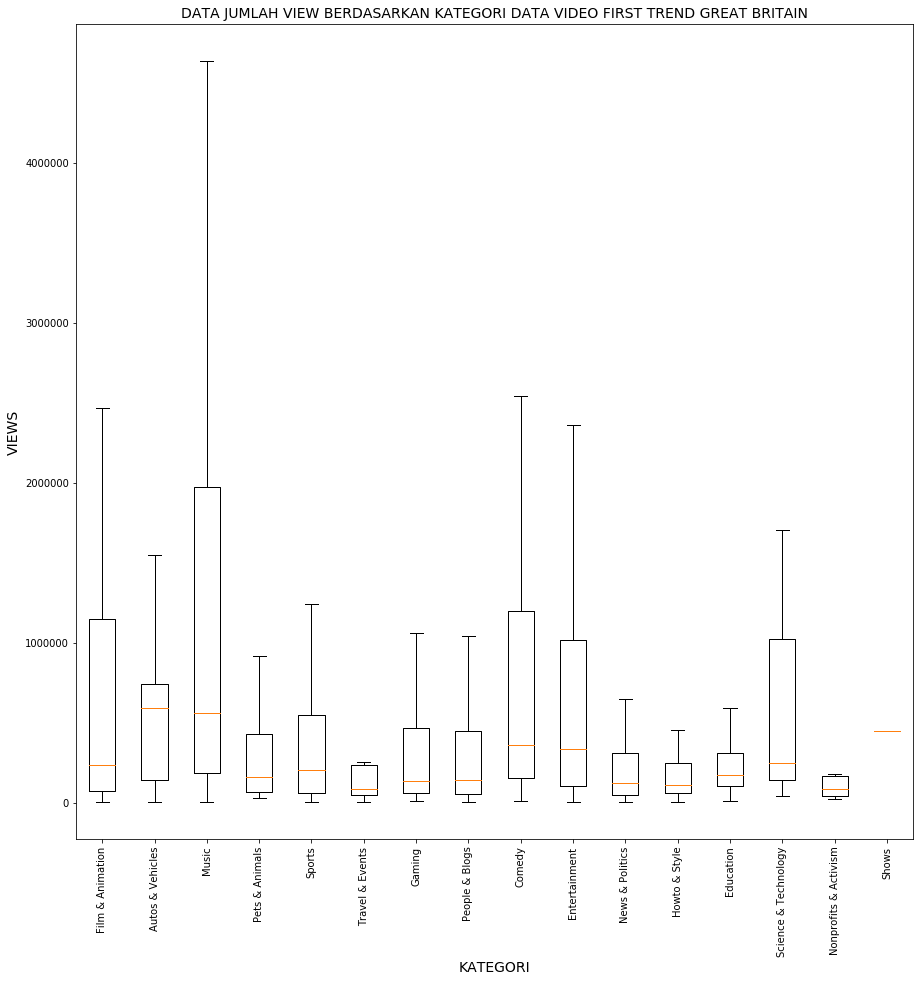

In [68]:
fig = plt.figure(1, figsize=(15, 15))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfFtrendViewsGB['views'].values, showfliers = False)

# penamaan x tick
ax.set_xticklabels(dfFtrendViewsGB['category'], rotation='vertical')

# penamaan judul
plt.title("DATA JUMLAH VIEW BERDASARKAN KATEGORI DATA VIDEO FIRST TREND GREAT BRITAIN", fontsize=14)

# penamaan label
plt.xlabel("KATEGORI", fontsize=14)
plt.ylabel("VIEWS", fontsize=14)

##  D. BOXPLOTTING RELATIVE VALUE DATA VIDEO FIRST TREND GREAT BRITAIN
Karena melakukan boxplotting terhadap absolute value untuk jumlah views, likes, dislikes, dan comments tidak dapat dilihat dengan baik karena data terlalu diverse. Maka diputgbkan untuk melakukan boxplotting likes, dislikes, dan comments terhadap views untuk setiap video kemudian dikalikan 100 agar range value terjaga mulai dari 0 hingga 100.

In [69]:
# Menambah kolom likes/views
dfGBvideosFirstTrend['likes/views(%)'] = dfGBvideosFirstTrend['likes']/dfGBvideosFirstTrend['views']*100

In [70]:
# Menambah kolom dislikes/views
dfGBvideosFirstTrend['dislikes/views(%)'] = dfGBvideosFirstTrend['dislikes']/dfGBvideosFirstTrend['views']*100

In [71]:
# Menambah kolom comments/views
dfGBvideosFirstTrend['comments/views(%)'] = dfGBvideosFirstTrend['comment_count']/dfGBvideosFirstTrend['views']*100

### 1D. Plotting Likes/Views % First Trend Great Britain

Text(0, 0.5, 'LIKES TERHADAP VIEWS')

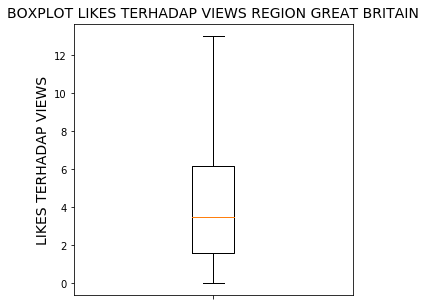

In [72]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfGBvideosFirstTrend['likes/views(%)'].values, showfliers = False)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT LIKES TERHADAP VIEWS REGION GREAT BRITAIN", fontsize=14)

plt.ylabel("LIKES TERHADAP VIEWS", fontsize=14)

### 2D. Plotting Disikes/Views % First Trend Great Britain

Text(0, 0.5, 'DISLIKES TERHADAP VIEWS')

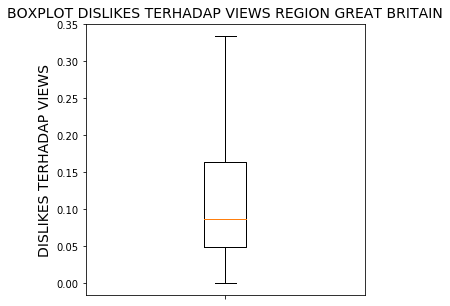

In [73]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfGBvideosFirstTrend['dislikes/views(%)'].values, showfliers = False)

#ax.set_ylim(0,100)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT DISLIKES TERHADAP VIEWS REGION GREAT BRITAIN", fontsize=14)

plt.ylabel("DISLIKES TERHADAP VIEWS", fontsize=14)

### 3D. Plotting Comments/Views % First Trend

Text(0, 0.5, 'COMMENTS TERHADAP VIEWS')

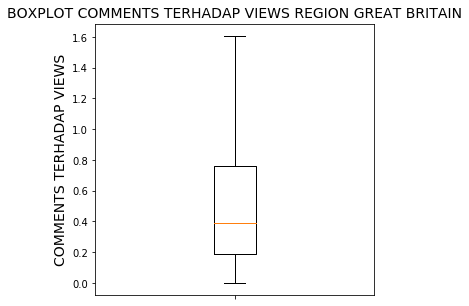

In [74]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfGBvideosFirstTrend['comments/views(%)'].values, showfliers = False)

#ax.set_ylim(0,100)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT COMMENTS TERHADAP VIEWS REGION GREAT BRITAIN", fontsize=14)

plt.ylabel("COMMENTS TERHADAP VIEWS", fontsize=14)

## Testing Z-Score DF ZView

In [75]:
# Menambah kolom likes/views
dfGBvideosFirstTrend_zView['likes/views(%)'] = dfGBvideosFirstTrend_zView['likes']/dfGBvideosFirstTrend_zView['views']*100

dfGBvideosFirstTrend_zView

C:\Users\Abi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,views_zscore,likes/views(%)
0,--uXQQ0h-yQ,2017-12-25,Paul McCartney - Pipes of Peace,PonteFractus,24,2008-11-24T17:59:52.000Z,"ww1|""great""|""war""|""trenches""|""tommies""",24723,216,3,10,-0.289164,0.873680
1,-3VBPAZPTQI,2017-12-31,NEW YEAR'S EVE MAKEUP TUTORIAL | JAMIE GENEVIEVE,Jamie Genevieve,22,2017-12-29T15:11:23.000Z,"jamie genevieve|""bblogger""|""youtuber""|""makeup""...",209192,11119,153,740,-0.247072,5.315213
2,-43MBOJnVks,2018-02-14,RAMPAGE - OFFICIAL TRAILER 2 [HD],Warner Bros. Pictures,24,2018-02-13T17:00:07.000Z,"Rampage|""Rampage Movie""|""Rampage Trailer""|""War...",544638,7985,330,1038,-0.170531,1.466111
3,-5WBCrazSfg,2017-11-29,Neymar will win the Ballon d'Or | Philippe Cou...,Soccer AM,17,2017-11-27T19:44:49.000Z,"Soccer AM|""Football""|""Soccer""|""Premier League""...",172090,4354,53,587,-0.255538,2.530071
4,-5aaJJQFvOg,2018-02-24,Havana - swing cover | dodie feat. FLASHBACK,doddleoddle,10,2018-02-21T22:01:06.000Z,"havana|""cover""|""a capella""|""swing""|""dodie""|""fl...",509454,82757,842,4535,-0.178560,16.244254
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,zwEn-ambXLw,2018-03-24,This Is Me - Cover by Shoshana Bean Featuring ...,Shoshana Bean,10,2018-03-22T08:30:07.000Z,"travis wall|""shoshana bean""|""greatest showman""...",52796,3265,24,150,-0.282758,6.184181
3268,zwrlJwed2mQ,2017-12-24,BigCityBeats WORLD CLUB DOME Zero Gravity (Off...,BigCityBeats,24,2017-12-13T13:58:13.000Z,"BigCityBeats|""Zero Gravity""|""Flugzeug""|""Airpla...",52023,585,1,16,-0.282935,1.124503
3269,zxGg8QqWrRQ,2017-12-14,"K Michelle on Boyfriend Kastan Sims, Having T...",ESSENCE,24,2017-12-06T19:37:48.000Z,"Essence|""essence live""|""Essence Now""|""Dr. Kast...",100286,1804,89,331,-0.271922,1.798855
3270,zxjv0lo8bU8,2018-05-24,MARCELO's son ENZO shows off his skills in the...,Real Madrid,17,2018-05-16T13:03:18.000Z,"Real Madrid C.F.|""Real Madrid""|""Real madrid ci...",214591,9137,76,552,-0.245840,4.257867


Text(0, 0.5, 'LIKES TERHADAP VIEWS')

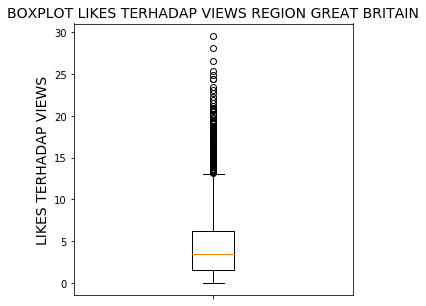

In [76]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfGBvideosFirstTrend_zView['likes/views(%)'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT LIKES TERHADAP VIEWS REGION GREAT BRITAIN", fontsize=14)

plt.ylabel("LIKES TERHADAP VIEWS", fontsize=14)

In [77]:
#Z-Score Likes/Views
dfGBvideosFirstTrend['likes/views_zscore'] = (dfGBvideosFirstTrend['likes/views(%)'] - dfGBvideosFirstTrend['likes/views(%)'].mean())/dfGBvideosFirstTrend['likes/views(%)'].std(ddof=0)

dfGBvideosFirstTrend_zLikesViews = dfGBvideosFirstTrend[dfGBvideosFirstTrend['likes/views_zscore'] < 3]

dfGBvideosFirstTrend_zLikesViews

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,views_zscore,likes/views(%),dislikes/views(%),comments/views(%),likes/views_zscore
0,--uXQQ0h-yQ,2017-12-25,Paul McCartney - Pipes of Peace,PonteFractus,24,2008-11-24T17:59:52.000Z,"ww1|""great""|""war""|""trenches""|""tommies""",24723,216,3,10,-0.289164,0.873680,0.012134,0.040448,-0.922637
1,-3VBPAZPTQI,2017-12-31,NEW YEAR'S EVE MAKEUP TUTORIAL | JAMIE GENEVIEVE,Jamie Genevieve,22,2017-12-29T15:11:23.000Z,"jamie genevieve|""bblogger""|""youtuber""|""makeup""...",209192,11119,153,740,-0.247072,5.315213,0.073139,0.353742,0.202692
2,-43MBOJnVks,2018-02-14,RAMPAGE - OFFICIAL TRAILER 2 [HD],Warner Bros. Pictures,24,2018-02-13T17:00:07.000Z,"Rampage|""Rampage Movie""|""Rampage Trailer""|""War...",544638,7985,330,1038,-0.170531,1.466111,0.060591,0.190585,-0.772536
3,-5WBCrazSfg,2017-11-29,Neymar will win the Ballon d'Or | Philippe Cou...,Soccer AM,17,2017-11-27T19:44:49.000Z,"Soccer AM|""Football""|""Soccer""|""Premier League""...",172090,4354,53,587,-0.255538,2.530071,0.030798,0.341101,-0.502966
4,-5aaJJQFvOg,2018-02-24,Havana - swing cover | dodie feat. FLASHBACK,doddleoddle,10,2018-02-21T22:01:06.000Z,"havana|""cover""|""a capella""|""swing""|""dodie""|""fl...",509454,82757,842,4535,-0.178560,16.244254,0.165275,0.890169,2.971728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,zwEn-ambXLw,2018-03-24,This Is Me - Cover by Shoshana Bean Featuring ...,Shoshana Bean,10,2018-03-22T08:30:07.000Z,"travis wall|""shoshana bean""|""greatest showman""...",52796,3265,24,150,-0.282758,6.184181,0.045458,0.284112,0.422858
3268,zwrlJwed2mQ,2017-12-24,BigCityBeats WORLD CLUB DOME Zero Gravity (Off...,BigCityBeats,24,2017-12-13T13:58:13.000Z,"BigCityBeats|""Zero Gravity""|""Flugzeug""|""Airpla...",52023,585,1,16,-0.282935,1.124503,0.001922,0.030756,-0.859088
3269,zxGg8QqWrRQ,2017-12-14,"K Michelle on Boyfriend Kastan Sims, Having T...",ESSENCE,24,2017-12-06T19:37:48.000Z,"Essence|""essence live""|""Essence Now""|""Dr. Kast...",100286,1804,89,331,-0.271922,1.798855,0.088746,0.330056,-0.688230
3270,zxjv0lo8bU8,2018-05-24,MARCELO's son ENZO shows off his skills in the...,Real Madrid,17,2018-05-16T13:03:18.000Z,"Real Madrid C.F.|""Real Madrid""|""Real madrid ci...",214591,9137,76,552,-0.245840,4.257867,0.035416,0.257234,-0.065203


Text(0, 0.5, 'LIKES TERHADAP VIEWS')

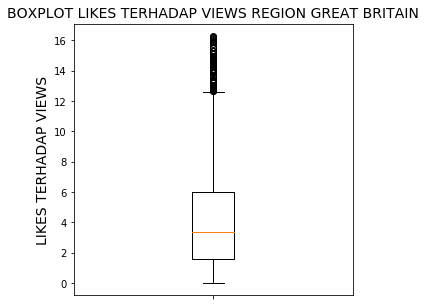

In [78]:
fig = plt.figure(1, figsize=(5, 5))

# membuat axes
ax = fig.add_subplot(111)

# boxplot
ax.boxplot(dfGBvideosFirstTrend_zLikesViews['likes/views(%)'].values)

# ax.set_ylim(0,1000)
ax.set_xticklabels("")

# penamaan judul
plt.title("BOXPLOT LIKES TERHADAP VIEWS REGION GREAT BRITAIN", fontsize=14)

plt.ylabel("LIKES TERHADAP VIEWS", fontsize=14)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## MENCARI MACAM-MACAM TOP 5

## TOP 5 KATEGORI VIDEO TERBANYAK YANG DIUPLOAD DI GREAT BRITAIN

Untuk mencari top 5 kategori video terbanyak dan terendah yang diupload berdasarkan masing-masing wilayah, maka dataframe baru yang menampilkan berapa banyak video yang diupload berdasarkan kategori perlu untuk dibuat.

In [79]:
data_upload_category_gb = {
    
    # a adalah hasil sorting array saat menemukan value yang unique dari id kategori data video region Great Britain
    'id' : a,
    'category' : [i for i in dfGBcategory['category']],
    'upload_count': [gGBvideo.get_group(items)['category_id'].count() for items in dfGBcategory['id']]
}

dfCatUploadGB = pd.DataFrame(data_upload_category_gb)

print("DATA UPLOAD BERDASARKAN KATEGORI GREAT BRITAIN")
dfCatUploadGB

DATA UPLOAD BERDASARKAN KATEGORI GREAT BRITAIN


,id,category,upload_count
0,1,Film & Animation,2577
1,2,Autos & Vehicles,144
2,10,Music,13754
3,15,Pets & Animals,534
4,17,Sports,1907
5,19,Travel & Events,96
6,20,Gaming,1788
7,22,People & Blogs,2926
8,23,Comedy,1828
9,24,Entertainment,9124


### 1. Top 5 Kategori Dengan Upload Tertinggi Wilayah Great Britain

In [80]:
#sorting tertinggi
top5GB_upload_high = dfCatUploadGB.nlargest(5, "upload_count")

#reindex dari 1
top5GB_upload_high.index = np.arange(1, len(top5GB_upload_high) + 1)


print("TOP 5 KATEGORI DENGAN UPLOAD TERBANYAK DI GREAT BRITAIN")
top5GB_upload_high

TOP 5 KATEGORI DENGAN UPLOAD TERBANYAK DI GREAT BRITAIN


,id,category,upload_count
1,10,Music,13754
2,24,Entertainment,9124
3,22,People & Blogs,2926
4,1,Film & Animation,2577
5,26,Howto & Style,1928


### 2. Top 5 Kategori Dengan Upload Terendah Wilayah Great Britain

In [81]:
#sorting terendah
top5GB_upload_low = dfCatUploadGB.sort_values('upload_count').head(5)

#reindex dari 1
top5GB_upload_low.index = np.arange(1, len(top5GB_upload_high) + 1)

print("TOP 5 KATEGORI DENGAN UPLOAD TERENDAH DI GREAT BRITAIN")
top5GB_upload_low

TOP 5 KATEGORI DENGAN UPLOAD TERENDAH DI GREAT BRITAIN


,id,category,upload_count
1,43,Shows,20
2,29,Nonprofits & Activism,90
3,19,Travel & Events,96
4,2,Autos & Vehicles,144
5,27,Education,457


<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## TOP 5 KATEGORI BERDASARKAN AVERAGE VIEW DI GREAT BRITAIN

Untuk mencari top 5 kategori video tertinggi dan terendah berdasarkan average view untuk tiap wilayah wilayah, maka dataframe baru yang menampilkan berapa average view berdasarkan kategori perlu untuk dibuat.

In [82]:
data_avgview_category_gb = {
    
    # a adalah hasil sorting array saat menemukan value yang unique dari id kategori data video region Great Britain
    'id' : a,
    'category' : [i for i in dfGBcategory['category']],
    'average_views': [gGBvideo.get_group(items)['views'].mean() for items in dfGBcategory['id']]
}

dfCatAvgViewGB = pd.DataFrame(data_avgview_category_gb)

### 1. Top 5 Kategori Dengan Average Views Tertinggi di Great Britain

In [83]:
#sorting tertinggi
top5GB_avgview_high = dfCatAvgViewGB.nlargest(5, "average_views")

#reindex dari 1
top5GB_avgview_high.index = np.arange(1, len(top5GB_avgview_high) + 1)

print("TOP 5 KATEGORI DENGAN AVERAGE VIEWS TERTINGGI DI GREAT BRITAIN")
top5GB_avgview_high

TOP 5 KATEGORI DENGAN AVERAGE VIEWS TERTINGGI DI GREAT BRITAIN


,id,category,average_views
1,10,Music,12444442.690781
2,29,Nonprofits & Activism,3919980.688889
3,24,Entertainment,3264607.961530
4,1,Film & Animation,3245132.955374
5,28,Science & Technology,3168703.196911


### 2. Top 5 Kategori Dengan Average Views Terendah di Great Britain

In [84]:
#sorting terendah
top5GB_avgview_low = dfCatAvgViewGB.sort_values('average_views').head(5)

#reindex dari 1
top5GB_avgview_low.index = np.arange(1, len(top5GB_avgview_low) + 1)

print("TOP 5 KATEGORI DENGAN AVERAGE VIEWS TERENDAH DI GREAT BRITAIN")
top5GB_avgview_low

TOP 5 KATEGORI DENGAN AVERAGE VIEWS TERENDAH DI GREAT BRITAIN


,id,category,average_views
1,26,Howto & Style,617300.428942
2,27,Education,972189.402626
3,20,Gaming,976856.561521
4,15,Pets & Animals,1013708.938202
5,25,News & Politics,1150311.326531


<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## TOP 5 CHANNEL DENGAN VIEWER TERBANYAK DI GREAT BRITAIN

In [85]:
#membuat dataframe baru dengan sum yang menghitung total viewer berdasarkan channel_title dalam datasets dfGBvideos
dfChannelViewGB = dfGBvideos.groupby(['channel_title'])['views'].sum().reset_index()

#melakukan sorting berdasarkan views
dfChannelViewGB.sort_values(by="views", inplace = True, ascending = False)

#reset index dari 1
dfChannelViewGB.reset_index(drop = True, inplace = True)
dfChannelViewGB.index = dfChannelViewGB.index + 1

dfChannelViewGB.head(5)

,channel_title,views
1,NickyJamTV,8516190092
2,Ozuna,8305198063
3,Bad Bunny,6891280759
4,DrakeVEVO,6581834413
5,ChildishGambinoVEVO,6101309613


<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## TOP 5 CHANNEL YANG PALING SERING MASUK DAILY TRENDING DI GREAT BRITAIN

Untuk mencari top 5 channel yang <b>paling sering masuk</b> daily trending di tiap wilayah + berapa <b>total viewernya</b>, maka dataframe baru yang menampilkan berapa kali channel muncul di datasets videos masing-masing wilayah perlu untuk dibuat, kemudian dimerge dengan dataframe baru juga yang menampilkan berapa jumlah total viewer tiap channel yang videonya pernah masuk ke dalam daily trending.

In [86]:
#membuat dataframe baru dengan value_counts yang menghitung berapa kali channel_title muncul dalam datasets dfGBvideos
dfChannelCountGB = pd.DataFrame(dfGBvideos.channel_title.value_counts().reset_index())

#reset index dari 1
dfChannelCountGB.index = dfChannelCountGB.index + 1

#rename kolom
dfChannelCountGB.columns = ['channel_title', 'trending_count']

dfChannelCountGB.head(5)

,channel_title,trending_count
1,The Tonight Show Starring Jimmy Fallon,208
2,TheEllenShow,207
3,Jimmy Kimmel Live,207
4,Saturday Night Live,206
5,WWE,205


In [87]:
#membuat dataframe baru yang merupakan hasil merge dari dfChannelCountGB dan dfChannelViewGB berdasarkan channel_title
dfTop5ChannelGB = pd.merge(dfChannelCountGB,dfChannelViewGB, on="channel_title").reset_index(drop = True)

#melakukan index ulang dari angka 1
dfTop5ChannelGB.index = dfTop5ChannelGB.index + 1      

print("TOP 5 CHANNEL YANG MASUK DAILY TRENDING DI GREAT BRITAIN")
dfTop5ChannelGB.head(5)

TOP 5 CHANNEL YANG MASUK DAILY TRENDING DI GREAT BRITAIN


,channel_title,trending_count,views
1,The Tonight Show Starring Jimmy Fallon,208,447390019
2,TheEllenShow,207,351577266
3,Jimmy Kimmel Live,207,398235069
4,Saturday Night Live,206,594799179
5,WWE,205,587090246


<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## TOP 5 VIDEO YANG PALING SERING MASUK DAILY TRENDING GREAT BRITAIN

Untuk mencari top 5 video yang paling sering masuk daily trending di tiap wilayah wilayah, maka dataframe baru yang menampilkan berapa kali video muncul di datasets Videos tersebut perlu untuk dibuat.

#### Di sini size() digunakan untuk menghitung suatu elemen pada dataframe, tetapi jika size() dikombinasikan dengan groupby() , maka size akan bertindak seperti count() yang menghitung kolom yang di-groupby-kan

In [88]:
#membuat dataframe baru dengan size() yang menghitung berapa kali video_id & title muncul dalam datasets dfGBvideos
dfTop5VideoGB = dfGBvideos.groupby(["video_id", "title","category_id"]).size().reset_index(name="count")

#sorting berdasarkan count
dfTop5VideoGB.sort_values(by="count", inplace = True, ascending = False)

#reset index dari 1
dfTop5VideoGB.reset_index(drop = True, inplace = True)
dfTop5VideoGB.index = dfTop5VideoGB.index + 1

print("TOP 5 VIDEO YANG MASUK DAILY TRENDING DI GREAT BRITAIN")
dfTop5VideoGB.head(5)

TOP 5 VIDEO YANG MASUK DAILY TRENDING DI GREAT BRITAIN


,video_id,title,category_id,count
1,NooW_RbfdWI,Jurassic World: Fallen Kingdom - Official Trai...,24,38
2,2z3EUY1aXdY,Justin Timberlake’s FULL Pepsi Super Bowl LII ...,17,38
3,BhIEIO0vaBE,To Our Daughter,22,38
4,Il-an3K9pjg,Anne-Marie - 2002 [Official Video],10,38
5,Q17z9a03YaM,Rich Brian - Cold (Official Music Video),24,37
